# Evaluación 2 

Carlos Oswaldo Ochoa Bojorquez

Librerías empleadas para la evaluación.

In [3]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d
from scipy import integrate, linalg
import pylab as plt
import math as math
%matplotlib inline

### Segunda Evaluación Física Computacional 1 (2021-1)

(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 



**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

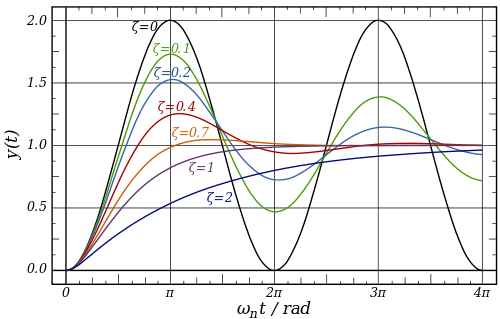

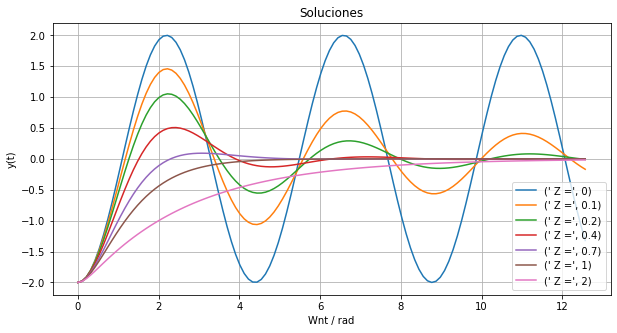

In [8]:
M=1
K=9
C=0.0000174

Wn=np.sqrt(K/M)
Z=np.sqrt((C)/2*np.sqrt(M*K))

Abserr=1.0e-8
Relerr=1.0e-6

def dX_dt(X, t=1):
    return np.array([ X[1] , - 2*Z*Wn*X[1] - (Wn**2)*X[0]])

X_f0=np.array([     0. ,     0.])
all(dX_dt(X_f0)==np.zeros(2))

t=np.linspace( 0, 4*np.pi, 120 )
A=(Wn * t)/(2*np.pi)
X0=np.array([-2, 0])                   
plt.figure(figsize=(10, 5));

for Z in [0 , 0.1, 0.2, 0.4, 0.7, 1, 2]:

  X, infodict=integrate.odeint(dX_dt, X0, A, full_output=True
                                 , atol=abserr, rtol=relerr)
  x, y=X.T 
  plt.plot(t, x, label=(" Z =", Z));


plt.grid();
plt.legend(loc='best');
plt.xlabel('Wnt / rad');
plt.ylabel('y(t)');
plt.title('Soluciones');
plt.show();

**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

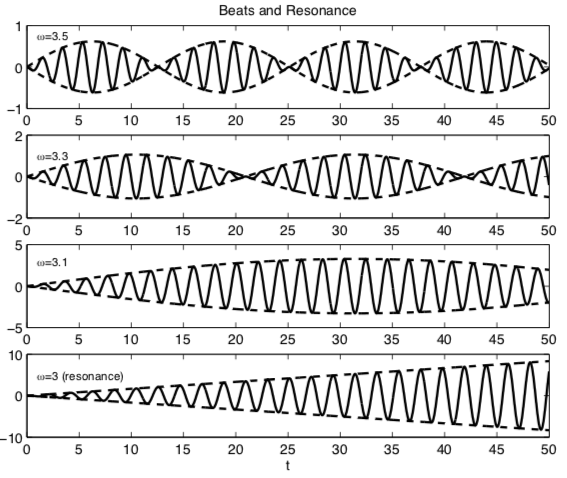

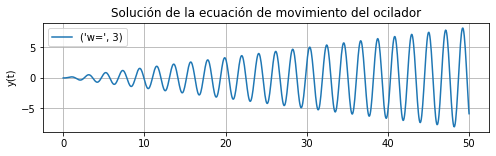

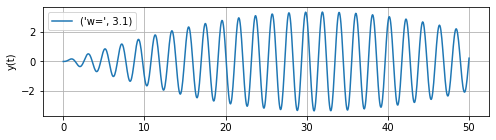

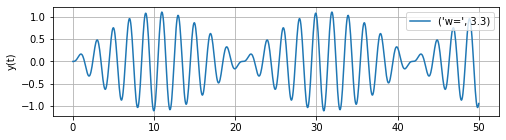

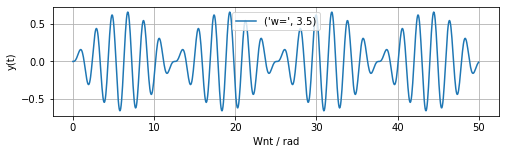

In [9]:
F0=1 
m=1
k=9
wn=3
w =[3,3.1,3.3,3.5]

def f(y,t,w):
    x,v = y 
    sol = [v,np.sin(w*t)-wn**2*x]
    return sol

y0 = [0,0]
t=np.linspace(0,50,850)

for d in w:
  
  plt.figure(figsize=(8,2))
  y = odeint(f,y0,t,args=(d,))
  plt.plot(t, y[:,0], label=('w=',d))
  plt.legend(loc='best')
  if d == 3.5:
    plt.xlabel('Wnt / rad')
  plt.ylabel('y(t)')
  if d == 3 : 
    plt.title('Solución de la ecuación de movimiento del ocilador')
  plt.grid()
  plt.show()

**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 



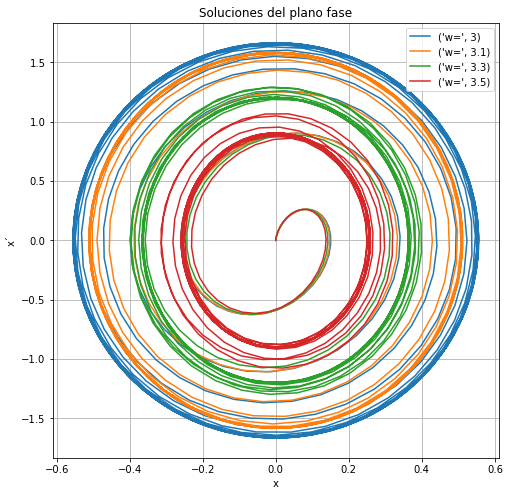

In [13]:
F0=1 
m=1
k=9
wn=3
w=[3,3.1,3.3,3.5]
z=0.1

def f(y,t,w):
    x,v = y 
    sol = [v,np.sin(w*t)-2*z*wn*v-wn**2*x]
    return sol

y0 = [0,0]
t=np.linspace(0,50,850)

plt.figure(figsize=(8,8))
for d in w:
  y = odeint(f,y0,t,args=(d,))
  plt.plot(y[:,0],y[:,1], label=('w=',d))
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('x´')
plt.title('Soluciones del plano fase')
plt.grid()
plt.show()